# Data setup

In [296]:
import numpy as np
from scipy.optimize import minimize
from functools import partial

x = np.array([3])

In [297]:
from scipy.stats import norm, multivariate_normal

def sigma_fn(c, w_0=0.5, w_1=7):
    return w_0 ** 2 + (w_1 ** 2) * c

def sigma_dw_0(c, w_0, w_1):
    return 2 * w_0

def sigma_dw_1(c, w_0, w_1):
    return 2 * w_1 * c

num_samples = 10000

c = np.random.rand(num_samples)
sigma_2 = sigma_fn(c)

eps = []

for sigma in sigma_2:
    assert sigma > 0, f'Sigma is {sigma}'
    noise = norm(scale=sigma ** 0.5).rvs(1)
    eps.append(noise)

eps = np.array(eps).squeeze()
assert eps.shape == (num_samples,)
y = x + eps

/Users/jinmeng1/opt/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


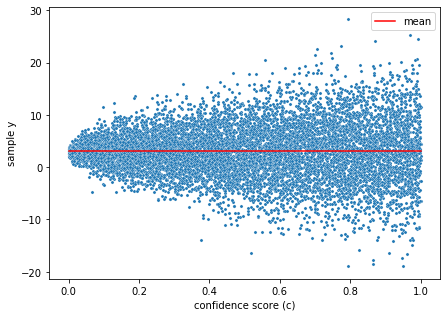

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(7, 5))
sns.scatterplot(c, y, s=10)

# Bigger c value = more variance/uncertainty
plt.xlabel('confidence score (c)')
plt.ylabel('sample y')
plt.plot([0, 1], [y.mean(), y.mean()], 'r', label='mean')
plt.legend(loc='upper right');

In [299]:
y[c < 0.1].std(), y[c > 0.9].std()

(1.631513555496426, 6.854089528893568)

# 1.1: Frequentist approach

In [300]:
def l_dmu(mu, w_0, w_1):
    return ((y - mu) / sigma_fn(c, w_0, w_1)).sum()

def l_dw0(mu, w_0, w_1):
    return 0.5 * ((y - mu) ** 2 / (sigma_fn(c, w_0, w_1) ** 2) * sigma_dw_0(c, w_0, w_1)
            - (sigma_dw_0(c, w_0, w_1) / sigma_fn(c, w_0, w_1))).sum()

def l_dw1(mu, w_0, w_1):
    return 0.5 * ((y - mu) ** 2 / (sigma_fn(c, w_0, w_1) ** 2) * sigma_dw_1(c, w_0, w_1)
            - (sigma_dw_1(c, w_0, w_1) / sigma_fn(c, w_0, w_1))).sum()

In [301]:
def l_jac(params):
    mu, w_0, w_1 = params
    return - np.array([l_dmu(mu, w_0, w_1),
                     l_dw0(mu, w_0, w_1),
                     l_dw1(mu, w_0, w_1),
                    ])

In [302]:
def log_fn(params):
    mu = params[0]
    w_0 = params[1]
    w_1 = params[2]
    
    first = (y - mu) ** 2 / sigma_fn(c, w_0=w_0, w_1=w_1)
    second = np.log(sigma_fn(c, w_0=w_0, w_1=w_1))
    return first.sum() + second.sum()

minimize(log_fn, [3, 0.5, 0.1], jac=l_jac, method='Newton-CG')

     fun: 39324.91619693036
     jac: array([-3.49852460e-06,  5.74124325e-05, -4.83664302e-05])
 message: 'Optimization terminated successfully.'
    nfev: 31
    nhev: 0
     nit: 28
    njev: 89
  status: 0
 success: True
       x: array([ 2.98252595, -0.44567328,  7.02240318])

In [303]:
mu_mle, w0_mle, w1_mle = minimize(log_fn, [3, 0.5, 0.1], jac=l_jac, method='Newton-CG').x
mu_mle, w0_mle, w1_mle

(2.982525951249195, -0.4456732796203507, 7.022403184139821)

# 1.2 Frequentist Regression

(array([3.000e+00, 1.200e+01, 4.500e+01, 8.800e+01, 2.240e+02, 4.230e+02,
        7.860e+02, 1.168e+03, 1.476e+03, 1.641e+03, 1.438e+03, 1.165e+03,
        7.350e+02, 4.410e+02, 2.140e+02, 8.900e+01, 4.000e+01, 9.000e+00,
        2.000e+00, 1.000e+00]),
 array([-363.15044999, -323.63377458, -284.11709917, -244.60042376,
        -205.08374835, -165.56707293, -126.05039752,  -86.53372211,
         -47.0170467 ,   -7.50037129,   32.01630412,   71.53297953,
         111.04965494,  150.56633035,  190.08300577,  229.59968118,
         269.11635659,  308.633032  ,  348.14970741,  387.66638282,
         427.18305823]),
 <a list of 20 Patch objects>)

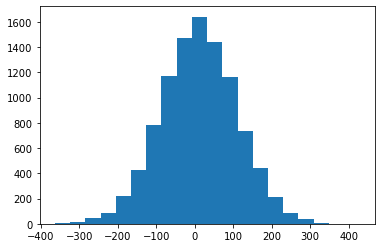

In [305]:
sigma_2 = sigma_fn_2(c, v_0=v_0, v_1=v_1)
plt.hist(np.random.normal(loc = w.T @ phi(x), scale=sigma_2), bins=20)

In [354]:
def sigma_fn_2(c, v_0=0.5, v_1=7):
    return v_0 ** 2 + (v_1 ** 2) * c

def sigma_2_dv_0(c, v_0, v_1):
    return 2 * v_0

def sigma_2_dv_1(c, v_0, v_1):
    return 2 * v_1 * c

def phi(x):
    return np.array([x ** 0, x, x ** 2]).squeeze()

num_samples = 1000

# x = np.random.randint(0, 101, size=num_samples)
# x = np.random.rand(num_samples)
x = np.linspace(-11,10, num_samples)

# c = np.zeros(num_samples)
c = np.random.rand(num_samples) + 10

# w_0 = 13
# w_1 = 0.9
# w_2 = 0.02
# v_0 = 0.01
# v_1 = 0

w_0 = 1.3
w_1 = 12
w_2 = 21
v_0 = 10
v_1 = 33


w = np.array([w_0, w_1, w_2]).squeeze()
v = np.array([v_0, v_1]).squeeze()
sigma_2 = sigma_fn_2(c, v_0=v_0, v_1=v_1)

eps = []

for sigma in sigma_2:
    assert sigma > 0, f'Sigma is {sigma}'
    noise = norm(scale=sigma ** 0.5).rvs(1)
    eps.append(noise)

eps = np.array(eps).squeeze()
assert eps.shape == (num_samples,)
# assert x.shape == (num_samples,)
y = w.T @ phi(x) + eps
y_true = w.T @ phi(x)
assert y.shape == (num_samples,)
assert y_true.shape == (num_samples,)

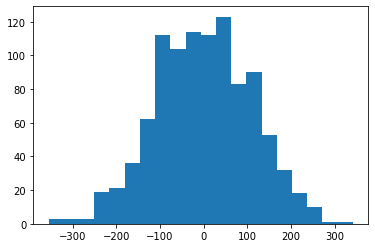

In [355]:
plt.hist(eps, bins=20);

/Users/jinmeng1/opt/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


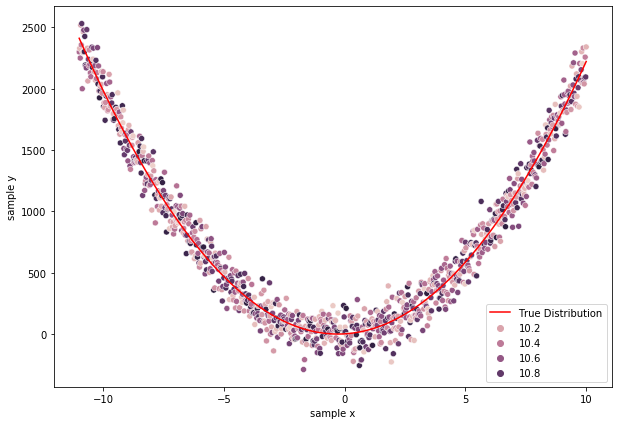

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 7))
sns.scatterplot(x,
                y,
                hue=c,
                )
plt.plot(x, y_true, 'r', label="True Distribution")
plt.xlabel('sample x')
plt.ylabel('sample y')
plt.legend(loc='lower right');

In [357]:
def log_fn(params):
    w = params[0: 3]
    v = params[3: ]

    first = (w.T @ phi(x) - y) ** 2 / sigma_fn_2(c, *v)
    second = np.log(sigma_fn_2(c, *v))
    return - 0.5 * (first.sum() + second.sum())

In [358]:
# def l_deriv_w(w, v):
#     F_minus1 = np.linalg.inv(F(v) ** 0.5)
#     result = Phi.T @ F_minus1 @ Phi @ w - Phi.T @ F_minus1 @ y
#     #result = phi(x) @ ((w.T @ phi(x) - y) / sigma_fn_2(c, *v))
#     return - result

# grad_epsilon = 1e-6
# w = start[0: 3]
# v = start[3: ]
# w_plus = np.array([w_0 + grad_epsilon, w_1, w_2]).squeeze()
# w_minus = np.array([w_0 - grad_epsilon, w_1, w_2]).squeeze()
# v = np.array([v_0, v_1])
# approx_gradient = (log_fn(np.concatenate([w_plus, v]))
#                    - log_fn(np.concatenate([w_minus, v]))
#                    ) / (2 * grad_epsilon)
# distance = np.linalg.norm(l_deriv_w(w, v)[0] - approx_gradient.item())

# distance

In [359]:
# deriv_w = - (Phi @ F_inv @ Phi.T @ w - Phi @ F_inv @ y)
# deriv_v0 = ((w @ Phi - y) * sigma_2_dv_0(c, *v) / (sigma_fn_2(c, *v) ** 2)).sum() - (sigma_2_dv_0(c, *v) / sigma_fn_2(c, *v)).sum()
# deriv_v1 = ((w @ Phi - y) * sigma_2_dv_1(c, *v) / (sigma_fn_2(c, *v) ** 2)).sum() - (sigma_2_dv_1(c, *v) / sigma_fn_2(c, *v)).sum()

Phi = phi(x)
F = sigma_2 * np.eye(len(sigma_2))
F_inv = np.linalg.inv(F)


def l_deriv_w(w, v):
    # F_minus1 = np.linalg.inv(F(v))
    # result = Phi.T @ F_minus1 @ Phi @ w - Phi.T @ F_minus1 @ y
    # result = Phi.T @ ((w.T @ Phi - y) / sigma_fn_2(c, *v))
    result = Phi @ F_inv @ Phi.T @ w - Phi @ F_inv @ y
    return - result

def l_deriv_v0(w, v):
    first = (w @ Phi - y) * sigma_2_dv_0(c, *v) / (sigma_fn_2(c, *v) ** 2)
    second = sigma_2_dv_0(c, *v) / sigma_fn_2(c, *v)
    return first.sum() - second.sum()

def l_deriv_v1(w, v):
    first = (w @ Phi - y) * sigma_2_dv_1(c, *v) / (sigma_fn_2(c, *v) ** 2)
    second = sigma_2_dv_1(c, *v) / sigma_fn_2(c, *v)
    return first.sum() - second.sum()

def l_jac(params):
    w = params[0: 3]
    v = params[3: ]
    return - np.array([*l_deriv_w(w, v),
                       l_deriv_v0(w, v),
                       l_deriv_v1(w, v),
                       ])

In [360]:
# start = np.array([14, 1, 0.03, 12, 75])

minimize(log_fn, np.append(w,v), jac=l_jac, method='Newton-CG').x

array([ 1.30983661, 11.38244762, 23.690752  ,  9.503265  , 15.78584245])

In [361]:
# print(start)
# end = start.copy()
# for _ in range(10):
#     end += 1e-4 * l_jac(end)
# print(end)

In [362]:
w_0_mle, w_1_mle, w_2_mle, v_0_mle, v_1_mle = minimize(log_fn, np.append(w,v), jac=l_jac, method='CG').x
w_0_mle, w_1_mle, w_2_mle, v_0_mle, v_1_mle

(1.3, 12.0, 21.0, 10.0, 33.0)

# 1.3 Bayesian approach